# KNN

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold     


data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/data1-Nancy.csv")

In [42]:
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [43]:
X_fsvar = VarianceThreshold(np.median(Xtrain.var().values)).fit_transform(X)

In [35]:
print(cross_val_score(KNN(), X, y, cv=5).mean())
print(cross_val_score(KNN(), X_fsvar, y, cv=5).mean())     

0.752190127364426
0.7517978850435096


In [46]:
knn = KNN(n_neighbors=3)

knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = knn.predict(Xtest)
knn.score(Xtest,Ytest)

0.729788624972761

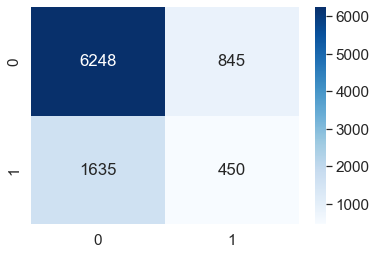

In [51]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [53]:
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.792592  0.880868  0.834402      7093
           1   0.347490  0.215827  0.266272      2085

    accuracy                       0.729789      9178
   macro avg   0.570041  0.548348  0.550337      9178
weighted avg   0.691476  0.729789  0.705338      9178

